# Just MA results with pures set

In [1]:
library(Rrunstruct)
library(reshape2)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: stringr
Loading required package: ggplot2
Loading required package: tidyr
Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [2]:
allreg <- read_and_process_structure_output("../allfiltu/allfiltu-str/")

reading files
finding label permutations for the reps
relabeling the traces and results


In [3]:
Qallreg <- allreg$q %>%
  select(Label,Pop,cluster_relabeled,probability) %>%
  group_by(Label,Pop,cluster_relabeled) %>%
  summarise(mean_prob = mean(probability))


In [4]:
QallregC <- Qallreg
QallregC$cluster_relabeled <- c("2","3","1",Qallreg$cluster_relabeled)[match(Qallreg$cluster_relabeled, c("1","2","3",Qallreg$cluster_relabeled))]

In [8]:
sub <- read_and_process_structure_output("./02192020_V2_afPure-str/")

reading files
finding label permutations for the reps
relabeling the traces and results


In [9]:
Qv2pure <- sub$q %>%
  select(Label,Pop,cluster_relabeled,probability) %>%
  group_by(Label,Pop,cluster_relabeled) %>%
  summarise(mean_prob = mean(probability))


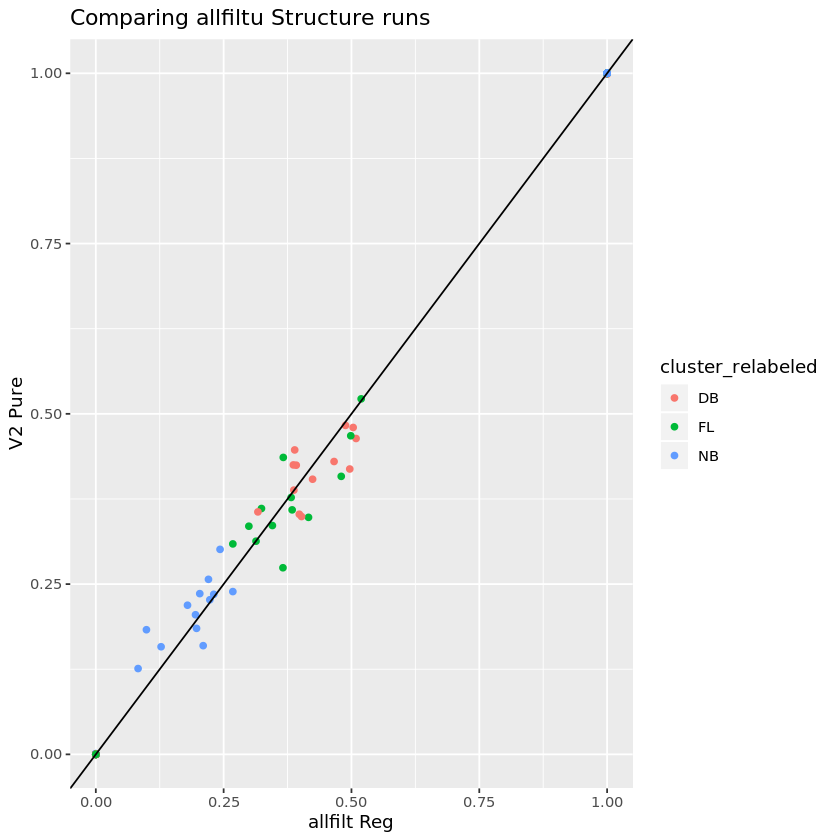

In [11]:
merged <- merge(QallregC,Qv2pure, by=c("Label","cluster_relabeled"))
merged$cluster_relabeled <- c("NB","DB","FL",merged$cluster_relabeled)[match(merged$cluster_relabeled, c("1","2","3",merged$cluster_relabeled))]
ggplot(merged, aes(x = mean_prob.y, y = mean_prob.x, colour = cluster_relabeled)) + geom_point() + 
  ggtitle("Comparing allfiltu Structure runs") + ylab("V2 Pure") + xlab("allfilt Reg") +
  geom_abline(intercept = 0, slope = 1)

In [12]:
comps <- mutate(merged, diff = mean_prob.x-mean_prob.y ) %>% arrange(desc(abs(diff)))

In [15]:
sp05 <- unique(comps[which(abs(comps$diff) > 0.05),]$Label)
sp05

[1] ALL06 RM11  ALL05 RM12  RM1   ALL02
144 Levels: ALL02 ALL03 ALL04 ALL05 ALL06 ALL11 ALL12 ... TN11855

In [24]:
dc <- dcast(comps[which(comps$Label %in% sp05),], Label + Pop.x ~ cluster_relabeled,value.var="diff")
colnames(dc) <- c("Label","Pop","DB","FL","NB")
dc

Label,Pop,DB,FL,NB
<fct>,<int>,<dbl>,<dbl>,<dbl>
ALL02,4,0.05800000,-0.06800000,0.01000000
ALL05,4,-0.07766667,0.03700000,0.03966667
ALL06,4,0.03260000,-0.09200000,0.05800000
RM1,4,-0.02000000,0.06933333,-0.05040000
RM11,4,-0.05313333,-0.03086667,0.08400000
RM12,4,0.03900000,-0.07180000,0.03266667


In [25]:
x <- QallregC[which(QallregC$Label %in% sp05),]
dcall <- dcast(x, Label + Pop ~ cluster_relabeled,value.var="mean_prob")
colnames(dcall) <- c("Label","Pop","NB","DB","FL")
mergedc <- merge(dcall, dc, by=c("Label","Pop"),all = T) %>% arrange(desc(abs(DB.y)))
colnames(mergedc) <- c("Label","Pop","NB","DB","FL","DB.diff","FL.diff","NB.diff")
#mergedc <- mergedc[,c(1:5,8,6,7)]
mergedc

Label,Pop,NB,DB,FL,DB.diff,FL.diff,NB.diff
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL05,4,0.2190,0.4190,0.3610,-0.07766667,0.03700000,0.03966667
ALL02,4,0.2050,0.4470,0.3480,0.05800000,-0.06800000,0.01000000
RM11,4,0.1830,0.3492,0.4678,-0.05313333,-0.03086667,0.08400000
RM12,4,0.2360,0.3560,0.4082,0.03900000,-0.07180000,0.03266667
ALL06,4,0.3010,0.4246,0.2740,0.03260000,-0.09200000,0.05800000
RM1,4,0.1596,0.4040,0.4360,-0.02000000,0.06933333,-0.05040000


## Just regular structure

In [26]:
subR <- read_and_process_structure_output("./02192020_V2_pop-str/")

reading files
finding label permutations for the reps
relabeling the traces and results


In [27]:
Qv2 <- subR$q %>%
  select(Label,Pop,cluster_relabeled,probability) %>%
  group_by(Label,Pop,cluster_relabeled) %>%
  summarise(mean_prob = mean(probability))


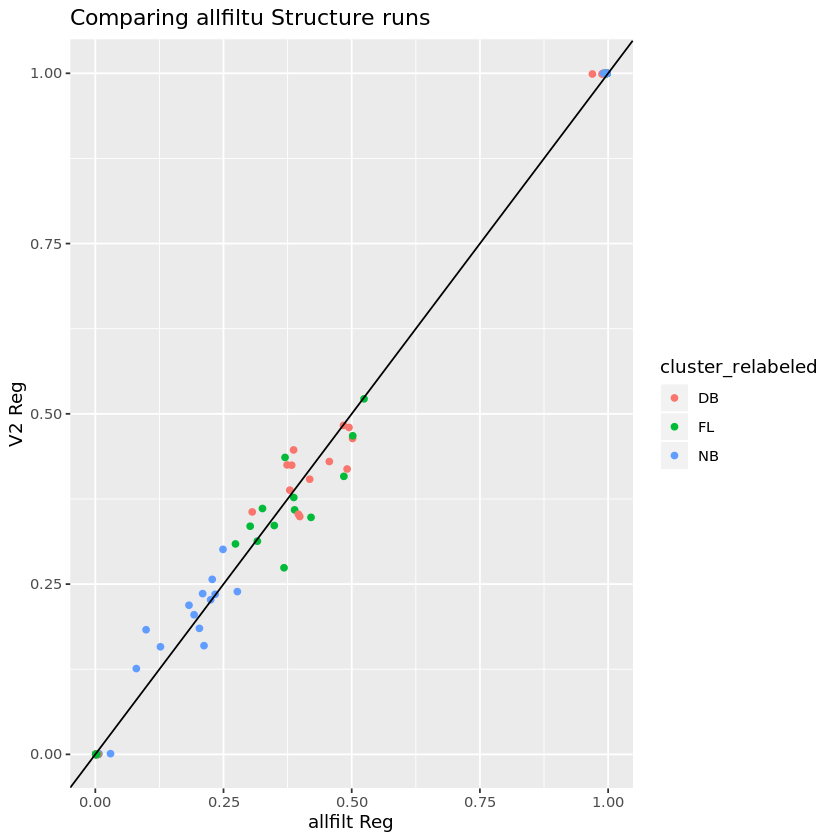

In [29]:
merged <- merge(QallregC,Qv2, by=c("Label","cluster_relabeled"))
merged$cluster_relabeled <- c("NB","DB","FL",merged$cluster_relabeled)[match(merged$cluster_relabeled, c("1","2","3",merged$cluster_relabeled))]
ggplot(merged, aes(x = mean_prob.y, y = mean_prob.x, colour = cluster_relabeled)) + geom_point() + 
  ggtitle("Comparing allfiltu Structure runs") + ylab("V2 Reg") + xlab("allfilt Reg") +
  geom_abline(intercept = 0, slope = 1)

In [35]:
compsR <- mutate(merged, diff = mean_prob.x-mean_prob.y ) %>% arrange(desc(abs(diff)))
head(compsR)

Label,cluster_relabeled,Pop.x,mean_prob.x,Pop.y,mean_prob.y,diff
<fct>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
ALL06,FL,4,0.2740,4,0.3680000,-0.09400000
RM11,NB,4,0.1830,4,0.0990000,0.08400000
RM12,FL,4,0.4082,4,0.4846667,-0.07646667
ALL02,FL,4,0.3480,4,0.4206667,-0.07266667
ALL05,DB,4,0.4190,4,0.4910000,-0.07200000
RM1,FL,4,0.4360,4,0.3700000,0.06600000


In [31]:
sp05R <- unique(compsR[which(abs(compsR$diff) > 0.05),]$Label)
sp05R

[1] ALL06 RM11  RM12  ALL02 ALL05 RM1   ALL12
144 Levels: ALL02 ALL03 ALL04 ALL05 ALL06 ALL11 ALL12 ... TN11855

In [33]:
dc <- dcast(compsR[which(compsR$Label %in% sp05R),], Label + Pop.x ~ cluster_relabeled,value.var="diff")
colnames(dc) <- c("Label","Pop","DB","FL","NB")
dc

Label,Pop,DB,FL,NB
<fct>,<int>,<dbl>,<dbl>,<dbl>
ALL02,4,0.06033333,-0.07266667,0.01233333
ALL05,4,-0.07200000,0.03500000,0.03633333
ALL06,4,0.04160000,-0.09400000,0.05200000
ALL12,4,0.05100000,-0.01300000,-0.03800000
RM1,4,-0.01400000,0.06600000,-0.05240000
RM11,4,-0.04946667,-0.03420000,0.08400000
RM12,4,0.05000000,-0.07646667,0.02666667


In [34]:
x <- QallregC[which(QallregC$Label %in% sp05R),]
dcall <- dcast(x, Label + Pop ~ cluster_relabeled,value.var="mean_prob")
colnames(dcall) <- c("Label","Pop","NB","DB","FL")
mergedc <- merge(dcall, dc, by=c("Label","Pop"),all = T) %>% arrange(desc(abs(DB.y)))
colnames(mergedc) <- c("Label","Pop","NB","DB","FL","DB.diff","FL.diff","NB.diff")
#mergedc <- mergedc[,c(1:5,8,6,7)]
mergedc

Label,Pop,NB,DB,FL,DB.diff,FL.diff,NB.diff
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL05,4,0.2190,0.4190,0.3610,-0.07200000,0.03500000,0.03633333
ALL02,4,0.2050,0.4470,0.3480,0.06033333,-0.07266667,0.01233333
ALL12,4,0.2390,0.4250,0.3360,0.05100000,-0.01300000,-0.03800000
RM12,4,0.2360,0.3560,0.4082,0.05000000,-0.07646667,0.02666667
RM11,4,0.1830,0.3492,0.4678,-0.04946667,-0.03420000,0.08400000
ALL06,4,0.3010,0.4246,0.2740,0.04160000,-0.09400000,0.05200000
RM1,4,0.1596,0.4040,0.4360,-0.01400000,0.06600000,-0.05240000


In [ ]:
colnames(dc91) <- c("Label","Pop","DB","FL","NB")
dc91

# Autocluster: Just MA results with pures set

In [5]:
sub <- read_and_process_structure_output("./02192020_V2_AC_afPure-str/")

reading files
finding label permutations for the reps
relabeling the traces and results


In [7]:
Qv2pure <- sub$q %>%
  select(Label,Pop,cluster_relabeled,probability) %>%
  group_by(Label,Pop,cluster_relabeled) %>%
  summarise(mean_prob = mean(probability))


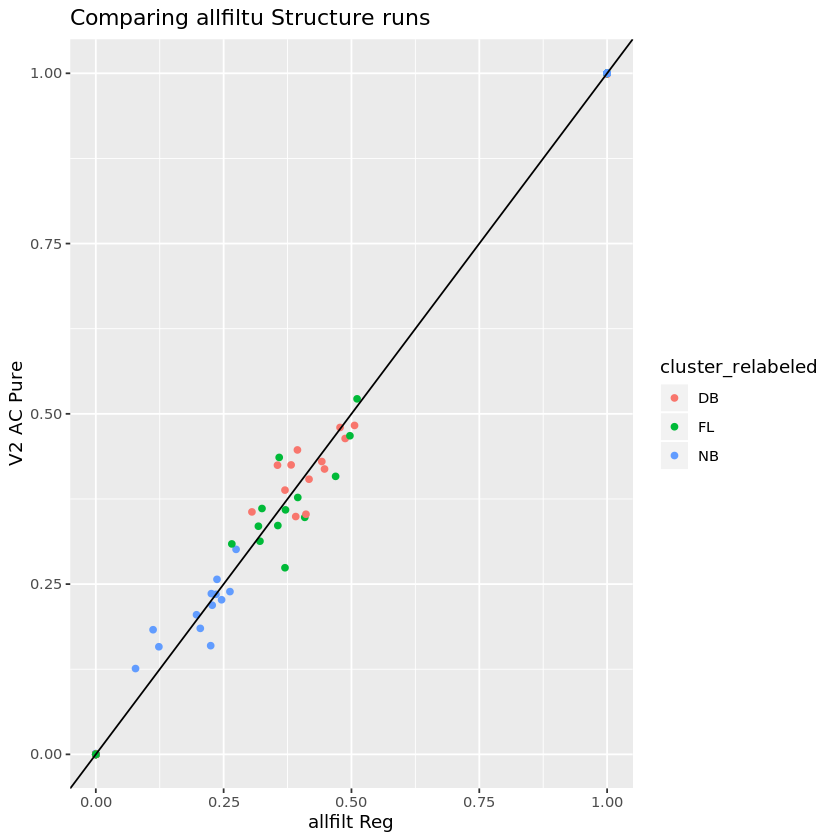

In [8]:
merged <- merge(QallregC,Qv2pure, by=c("Label","cluster_relabeled"))
merged$cluster_relabeled <- c("NB","DB","FL",merged$cluster_relabeled)[match(merged$cluster_relabeled, c("1","2","3",merged$cluster_relabeled))]
ggplot(merged, aes(x = mean_prob.y, y = mean_prob.x, colour = cluster_relabeled)) + geom_point() + 
  ggtitle("Comparing allfiltu Structure runs") + ylab("V2 AC Pure") + xlab("allfilt Reg") +
  geom_abline(intercept = 0, slope = 1)

In [9]:
comps <- mutate(merged, diff = mean_prob.x-mean_prob.y ) %>% arrange(desc(abs(diff)))

In [10]:
sp05 <- unique(comps[which(abs(comps$diff) > 0.05),]$Label)
sp05

[1] ALL06 RM1   RM11  RM12  ALL02 RM13 
144 Levels: ALL02 ALL03 ALL04 ALL05 ALL06 ALL11 ALL12 ... TN11855

In [11]:
dc <- dcast(comps[which(comps$Label %in% sp05),], Label + Pop.x ~ cluster_relabeled,value.var="diff")
colnames(dc) <- c("Label","Pop","DB","FL","NB")
dc

Label,Pop,DB,FL,NB
<fct>,<int>,<dbl>,<dbl>,<dbl>
ALL02,4,0.05266667,-0.06066667,0.00800000
ALL06,4,0.06926667,-0.09600000,0.02666667
RM1,4,-0.01300000,0.07733333,-0.06506667
RM11,4,-0.04180000,-0.02920000,0.07100000
RM12,4,0.05066667,-0.06080000,0.01000000
RM13,4,-0.05840000,0.01100000,0.04833333


In [12]:
x <- QallregC[which(QallregC$Label %in% sp05),]
dcall <- dcast(x, Label + Pop ~ cluster_relabeled,value.var="mean_prob")
colnames(dcall) <- c("Label","Pop","NB","DB","FL")
mergedc <- merge(dcall, dc, by=c("Label","Pop"),all = T) %>% arrange(desc(abs(DB.y)))
colnames(mergedc) <- c("Label","Pop","NB","DB","FL","DB.diff","FL.diff","NB.diff")
#mergedc <- mergedc[,c(1:5,8,6,7)]
mergedc

Label,Pop,NB,DB,FL,DB.diff,FL.diff,NB.diff
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL06,4,0.3010,0.4246,0.2740,0.06926667,-0.09600000,0.02666667
RM13,4,0.1260,0.3526,0.5220,-0.05840000,0.01100000,0.04833333
ALL02,4,0.2050,0.4470,0.3480,0.05266667,-0.06066667,0.00800000
RM12,4,0.2360,0.3560,0.4082,0.05066667,-0.06080000,0.01000000
RM11,4,0.1830,0.3492,0.4678,-0.04180000,-0.02920000,0.07100000
RM1,4,0.1596,0.4040,0.4360,-0.01300000,0.07733333,-0.06506667


## Just regular structure

In [13]:
subR <- read_and_process_structure_output("./02192020_V2_AC_pop-str/")

reading files
finding label permutations for the reps
relabeling the traces and results


In [14]:
Qv2 <- subR$q %>%
  select(Label,Pop,cluster_relabeled,probability) %>%
  group_by(Label,Pop,cluster_relabeled) %>%
  summarise(mean_prob = mean(probability))


In [17]:
Qv2C <- Qv2
Qv2C$cluster_relabeled <- c("2","3","1",Qv2$cluster_relabeled)[match(Qv2$cluster_relabeled, c("1","2","3",Qv2$cluster_relabeled))]

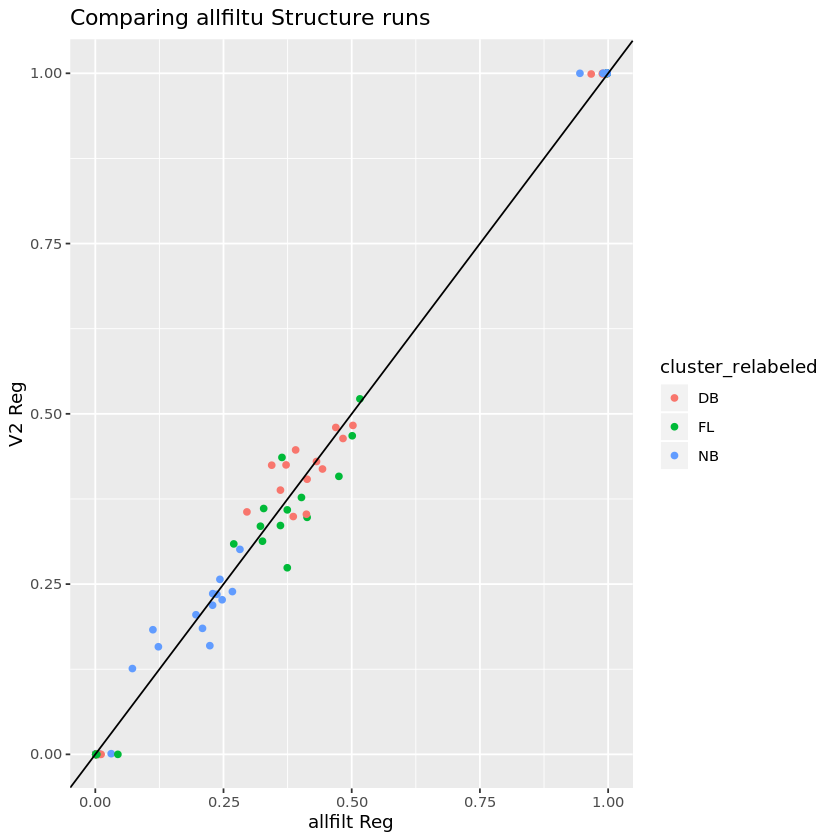

In [19]:
merged <- merge(QallregC,Qv2C, by=c("Label","cluster_relabeled"))
merged$cluster_relabeled <- c("NB","DB","FL",merged$cluster_relabeled)[match(merged$cluster_relabeled, c("1","2","3",merged$cluster_relabeled))]
ggplot(merged, aes(x = mean_prob.y, y = mean_prob.x, colour = cluster_relabeled)) + geom_point() + 
  ggtitle("Comparing allfiltu Structure runs") + ylab("V2 Reg") + xlab("allfilt Reg") +
  geom_abline(intercept = 0, slope = 1)

In [20]:
compsR <- mutate(merged, diff = mean_prob.x-mean_prob.y ) %>% arrange(desc(abs(diff)))
head(compsR)

Label,cluster_relabeled,Pop.x,mean_prob.x,Pop.y,mean_prob.y,diff
<fct>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
ALL06,FL,4,0.2740,4,0.3743333,-0.10033333
ALL06,DB,4,0.4246,4,0.3440000,0.08060000
RM1,FL,4,0.4360,4,0.3640000,0.07200000
RM11,NB,4,0.1830,4,0.1123333,0.07066667
RM12,FL,4,0.4082,4,0.4750000,-0.06680000
ALL02,FL,4,0.3480,4,0.4130000,-0.06500000


In [21]:
sp05R <- unique(compsR[which(abs(compsR$diff) > 0.05),]$Label)
sp05R

[1] ALL06 RM1   RM11  RM12  ALL02 RM13  SL04  ALL12
144 Levels: ALL02 ALL03 ALL04 ALL05 ALL06 ALL11 ALL12 ... TN11855

In [22]:
dc <- dcast(compsR[which(compsR$Label %in% sp05R),], Label + Pop.x ~ cluster_relabeled,value.var="diff")
colnames(dc) <- c("Label","Pop","DB","FL","NB")
dc

Label,Pop,DB,FL,NB
<fct>,<int>,<dbl>,<dbl>,<dbl>
ALL02,4,0.05633333,-0.0650000,0.008666667
ALL06,4,0.08060000,-0.1003333,0.019000000
ALL12,4,0.05300000,-0.0250000,-0.028333333
RM1,4,-0.00900000,0.0720000,-0.063733333
RM11,4,-0.03680000,-0.0332000,0.070666667
RM12,4,0.06033333,-0.0668000,0.007000000
RM13,4,-0.05906667,0.0060000,0.053666667
SL04,1,-0.01133333,-0.0440000,0.055000000


In [23]:
x <- QallregC[which(QallregC$Label %in% sp05R),]
dcall <- dcast(x, Label + Pop ~ cluster_relabeled,value.var="mean_prob")
colnames(dcall) <- c("Label","Pop","NB","DB","FL")
mergedc <- merge(dcall, dc, by=c("Label","Pop"),all = T) %>% arrange(desc(abs(DB.y)))
colnames(mergedc) <- c("Label","Pop","NB","DB","FL","DB.diff","FL.diff","NB.diff")
#mergedc <- mergedc[,c(1:5,8,6,7)]
mergedc

Label,Pop,NB,DB,FL,DB.diff,FL.diff,NB.diff
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL06,4,0.3010,0.4246,0.2740,0.08060000,-0.1003333,0.019000000
RM12,4,0.2360,0.3560,0.4082,0.06033333,-0.0668000,0.007000000
RM13,4,0.1260,0.3526,0.5220,-0.05906667,0.0060000,0.053666667
ALL02,4,0.2050,0.4470,0.3480,0.05633333,-0.0650000,0.008666667
ALL12,4,0.2390,0.4250,0.3360,0.05300000,-0.0250000,-0.028333333
RM11,4,0.1830,0.3492,0.4678,-0.03680000,-0.0332000,0.070666667
SL04,1,1.0000,0.0000,0.0000,-0.01133333,-0.0440000,0.055000000
RM1,4,0.1596,0.4040,0.4360,-0.00900000,0.0720000,-0.063733333


In [ ]:
colnames(dc91) <- c("Label","Pop","DB","FL","NB")
dc91